In [31]:
"""
1. Import Libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal

sns.set_theme(style="whitegrid")


In [32]:
"""
2. Load Cleaned Data
Each CSV file contains cleaned solar data for one country.
We add a 'Country' column to each and then concatenate them.
"""
benin = pd.read_csv('../data/benin_clean.csv')
sl = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sl['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sl, togo], ignore_index=True)

print("✅ Data loaded successfully!")



✅ Data loaded successfully!


# 1. Summary Statistics & Missing-Value Report

In [33]:
# first five rows of tabular data
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


In [34]:
# log the last examples of this dataset
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
1543512,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,Togo
1543513,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,Togo
1543514,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,Togo
1543515,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,Togo
1543516,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,Togo


In [35]:
# log random 5 exaples of the dataset
df.sample(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
957761,2022-09-09 07:33,34.6,0.0,32.4,39.0,37.8,22.4,100.0,0.0,0.0,0.0,0.0,0.0,1003,0,0.0,23.8,24.1,Sierra Leone
1056001,2021-11-14 01:28,-2.3,0.0,0.0,0.0,0.0,24.9,53.8,1.7,1.9,0.3,221.9,0.9,974,0,0.0,23.1,22.7,Togo
404610,2022-05-21 04:37,-1.5,-0.3,-1.5,0.0,0.0,28.1,69.7,6.2,7.2,0.8,209.6,12.0,994,0,0.0,28.2,27.6,Benin
33788,2021-09-01 21:22,-1.5,-0.3,-1.5,0.0,0.0,29.4,91.6,0.0,0.0,0.0,0.0,0.0,992,0,0.0,29.1,28.6,Benin
900382,2022-07-29 10:21,713.6,300.4,471.8,674.6,653.8,26.3,78.5,3.9,5.4,0.9,177.3,15.6,1004,0,0.0,42.3,40.2,Sierra Leone


In [36]:
# check more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543517 entries, 0 to 1543516
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1543517 non-null  object 
 1   GHI            1543517 non-null  float64
 2   DNI            1543517 non-null  float64
 3   DHI            1543517 non-null  float64
 4   ModA           1543517 non-null  float64
 5   ModB           1543517 non-null  float64
 6   Tamb           1543517 non-null  float64
 7   RH             1543517 non-null  float64
 8   WS             1543517 non-null  float64
 9   WSgust         1543517 non-null  float64
 10  WSstdev        1543517 non-null  float64
 11  WD             1543517 non-null  float64
 12  WDstdev        1543517 non-null  float64
 13  BP             1543517 non-null  int64  
 14  Cleaning       1543517 non-null  int64  
 15  Precipitation  1543517 non-null  float64
 16  TModA          1543517 non-null  float64
 17  TModB   

In [37]:
# check if a null value exists
print("Check for missing values:")
df.isna().sum()

Check for missing values:


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Country          0
dtype: int64

In [38]:
# log statistical data values
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                GHI           DNI           DHI          ModA          ModB  \
count  1.543517e+06  1.543517e+06  1.543517e+06  1.543517e+06  1.543517e+06   
mean   2.151892e+02  1.398560e+02  1.108606e+02  2.139741e+02  2.067145e+02   
std    3.098433e+02  2.399596e+02  1.527994e+02  3.071585e+02  2.969305e+02   
min   -1.590000e+01 -7.800000e+00 -1.670000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%   -1.000000e-01  0.000000e+00  2.000000e-01  2.300000e+00  2.200000e+00   
75%    4.009000e+02  2.097000e+02  2.139000e+02  3.875000e+02  3.744000e+02   
max    1.233000e+03  9.523000e+02  5.914000e+02  1.205100e+03  1.175000e+03   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.543517e+06  1.543517e+06  1.543517e+06  1.543517e+06  1.543517e+06   
mean   2.736891e+01  6.308431e+01  1.826228e+00  2.506211e+00  4.556309e-01   
std    5.13

In [39]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp  Country
count            1543517  1543517
unique            641600        3
top     2022-08-09 00:00    Benin
freq                   3   517860


In [40]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
               Timestamp           GHI           DNI           DHI  \
count            1543517  1.543517e+06  1.543517e+06  1.543517e+06   
unique            641600           NaN           NaN           NaN   
top     2022-08-09 00:00           NaN           NaN           NaN   
freq                   3           NaN           NaN           NaN   
mean                 NaN  2.151892e+02  1.398560e+02  1.108606e+02   
std                  NaN  3.098433e+02  2.399596e+02  1.527994e+02   
min                  NaN -1.590000e+01 -7.800000e+00 -1.670000e+01   
25%                  NaN -2.200000e+00 -2.000000e-01 -1.400000e+00   
50%                  NaN -1.000000e-01  0.000000e+00  2.000000e-01   
75%                  NaN  4.009000e+02  2.097000e+02  2.139000e+02   
max                  NaN  1.233000e+03  9.523000e+02  5.914000e+02   

                ModA          ModB          Tamb            RH            WS  \
count   1.543517e+06  1.543517e+06  1.543517e+0

In [41]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [42]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Timestamp': 641600, 'Country': 3}



# 2. Let's Apply Exploratory Data Analysis Technique

## Univariate Analysis

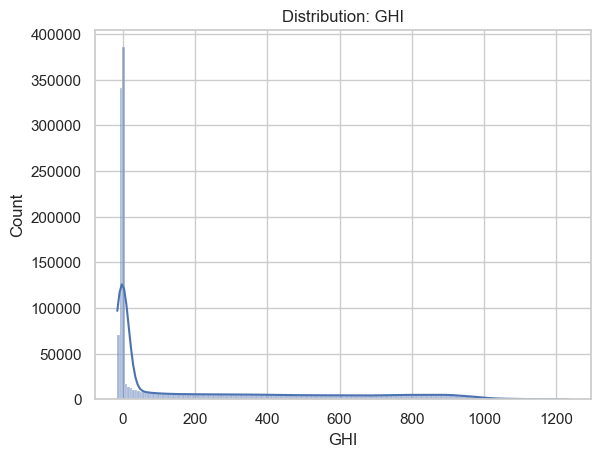

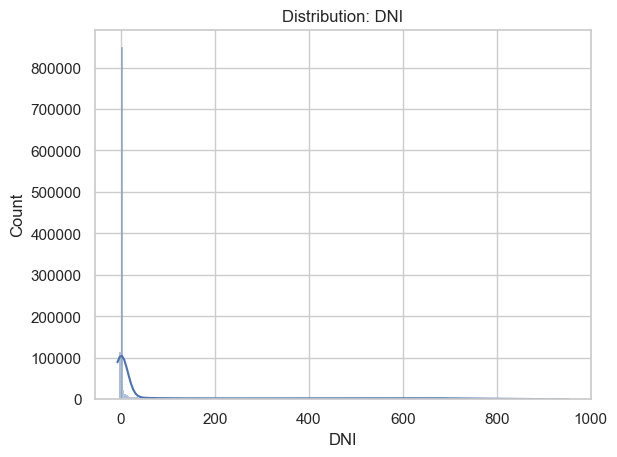

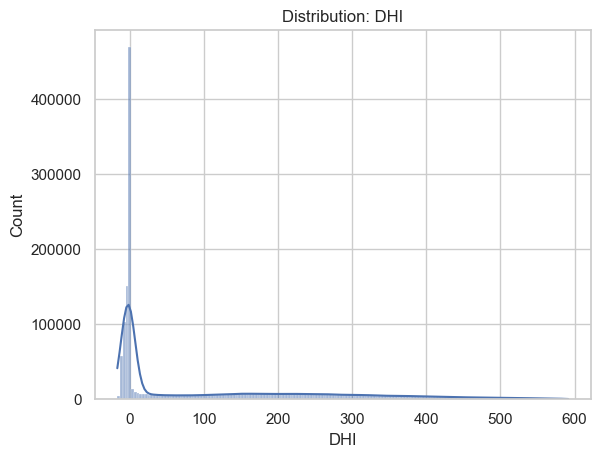

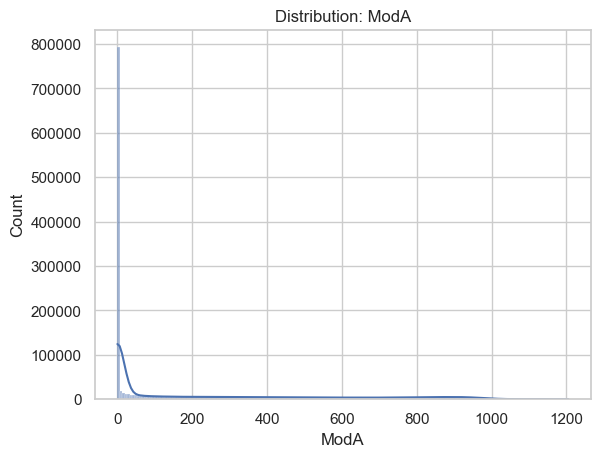

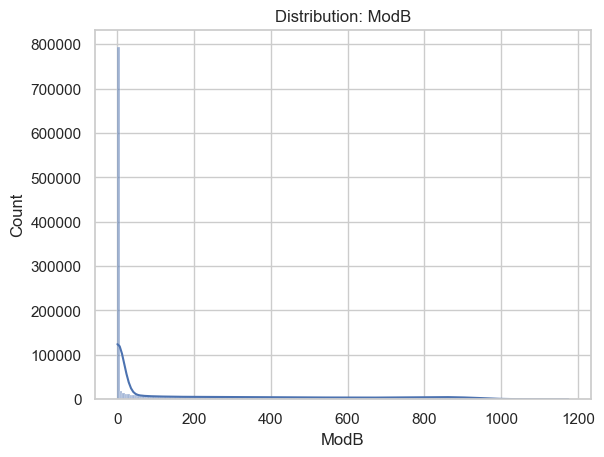

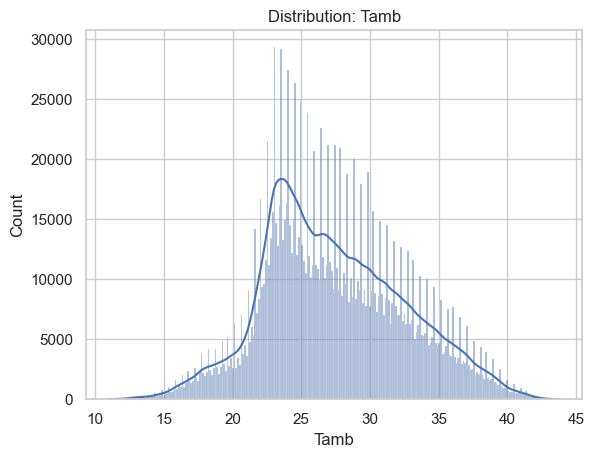

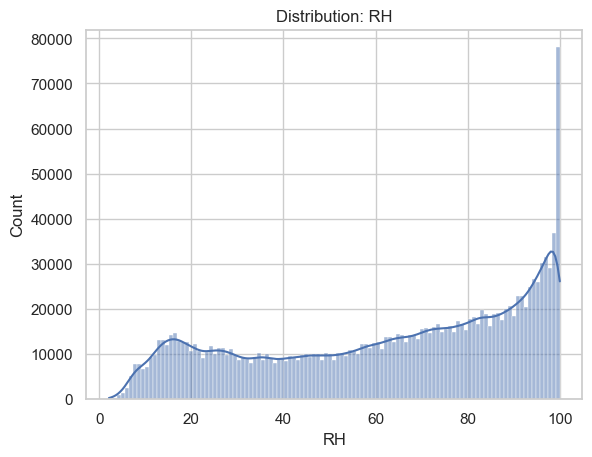

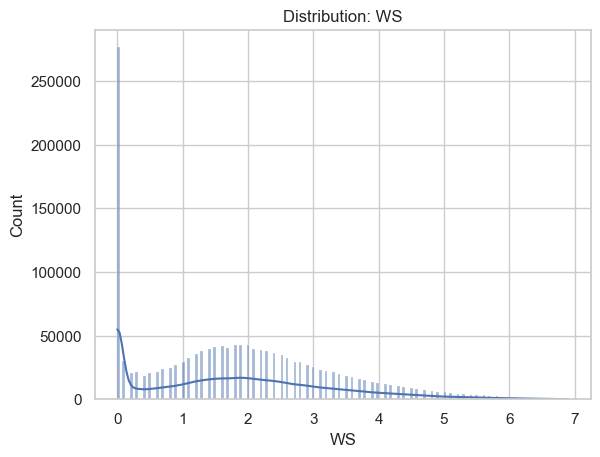

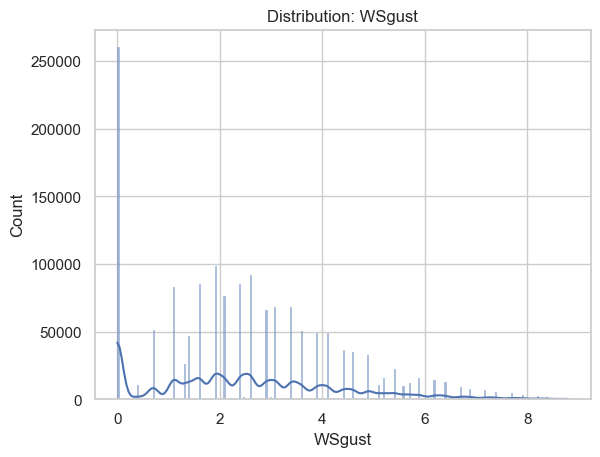

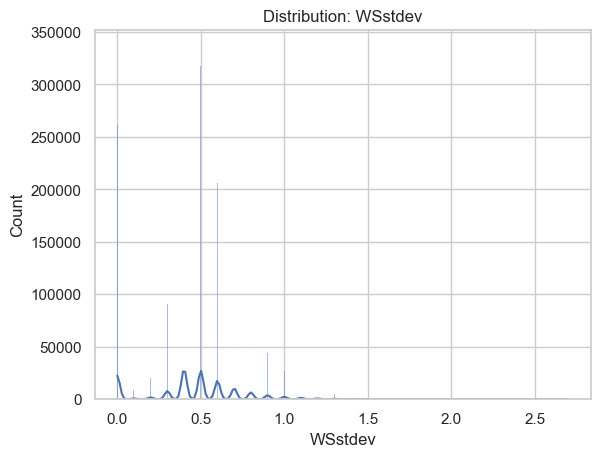

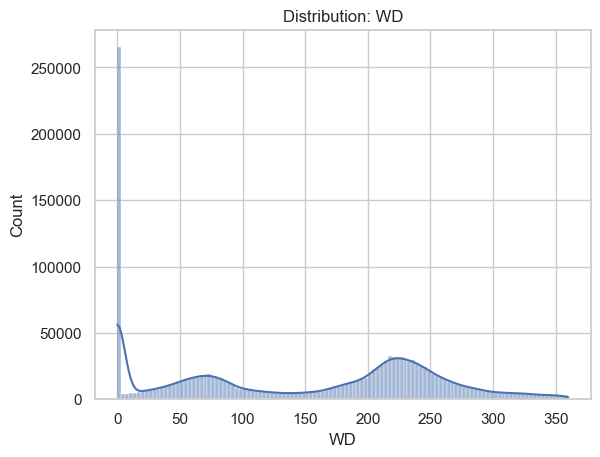

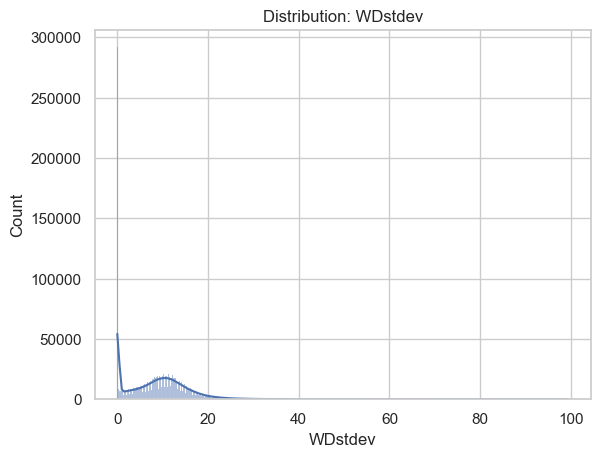

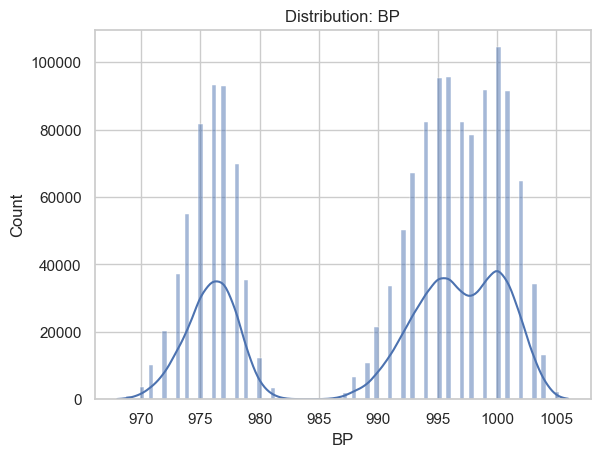

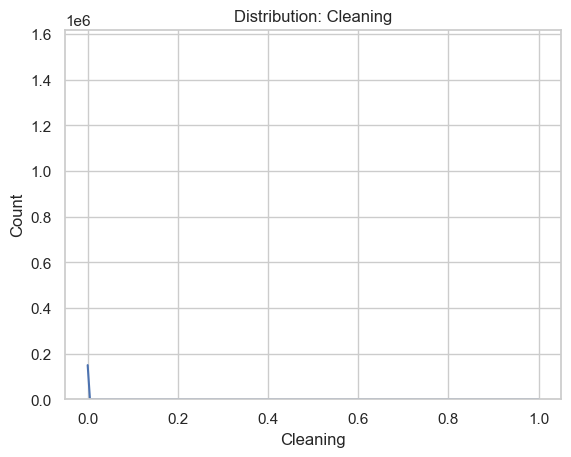

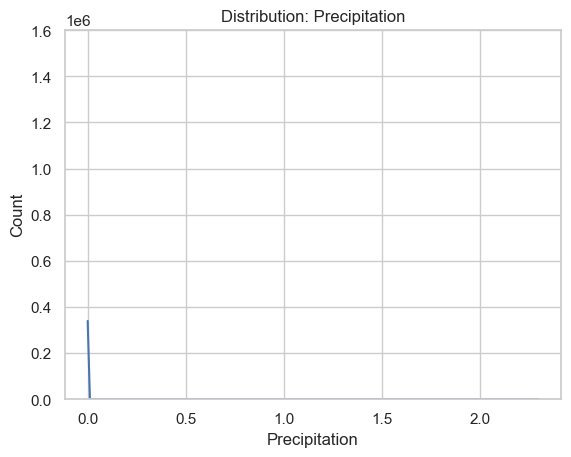

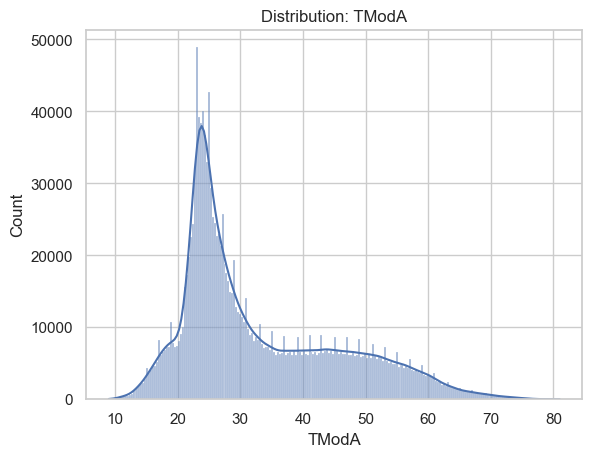

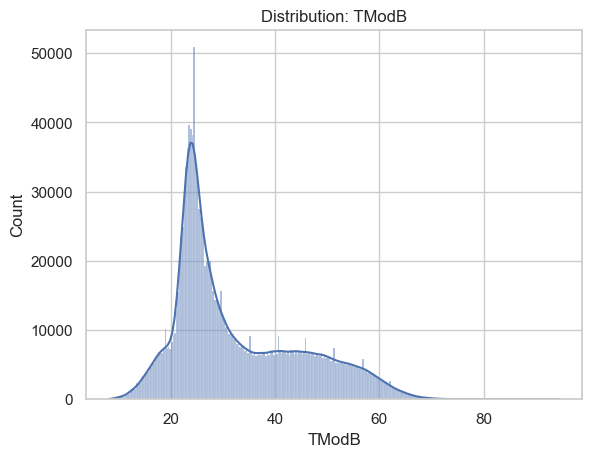

In [43]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


## Univariant Analysis - Intepretation

Global horizontal irradiance distribution and intepretation
Shape and Skewness
- Skewness: The distribution of GHI is extremely right-skewed (positively skewed). The majority of observations are clustered at the left side near zero, with a rapidly diminishing frequency extending in a long, flat tail toward the higher GHI values (up to $\sim 1200$).

- Shape: The shape is strongly J-shaped, dominated by a single, extremely high initial mode near zero. The rest of the distribution is flat, resembling an exponential decay from the zero value.

Central Tendency (Mode and Median)

- Mode: The mode is at or very close to $\text{GHI} = 0$. The count for this bin reaches approximately 400,000, making it the most frequent observation by a large margin.

- Median: Due to the severe right skew, the median (50th percentile) is located to the right of the mode, but still within the very low GHI range.Mean: The mean (average GHI) will be pulled toward the right tail, making it the highest of the three measures (mode < median < mean).

Direct normal irradiance distribution
Shape and Skewness
- Skewness: The distribution of DNI is extremely right-skewed (positively skewed). This skewness is even more pronounced than with GHI because DNI is much more sensitive to cloud cover.

- Shape: It is dominated by a massive J-shaped spike right at $\text{DNI} = 0$. The frequency drops off almost immediately and remains near zero, extending in a very long, flat tail towards the higher values (up to $\sim 1000$).

Central Tendency (Mode and Median)

- Mode: The mode is overwhelmingly at $\text{DNI} = 0$. The count for this bin is around 850,000, making it the most frequent observation by a huge margin.

- Median: Due to the extremely high frequency at zero, the median (50th percentile) is likely to be exactly $\text{DNI} = 0$ or very close to it. This suggests that more than half of the total observations recorded DNI as zero.

- Mean: The mean (average DNI) is pulled far to the right by the few high-irradiance values, making it significantly greater than the mode and median.

Diffuse horizontal irradiance
Shape and Skewness
- Skewness: The distribution of DHI is also extremely right-skewed (positively skewed), though the shape differs from the extreme J-shape seen in DNI.

- Shape: It features a very high initial mode at $\text{DHI} = 0$, representing nighttime hours. However, the distribution then has a secondary mode/higher concentration of data in the low DHI range (approximately $20$ to $50 \text{ W/m}^2$), followed by a long, low tail extending up to $\sim 600$.

Central Tendency (Mode and Median)
- Mode: The primary mode is $\text{DHI} = 0$ (representing nighttime).

- Median: Likely at or very close to 0.

- Mean: Highest of the three, pulled right by the positive tail ($\text{Mode} \leq \text{Median} < \text{Mean}$).

Physical Significance

- Signature: The distribution's notable feature is a secondary high concentration of observations just above zero.

- Meaning: This clustering represents the high frequency of cloudy day light, where the direct sun beam is blocked, but the diffuse sky radiation is still present.

ModA distribution
Shape and Skewness
- Skewness: The distribution is extremely right-skewed (positively skewed). The vast majority of the data is clustered at or near zero.

- Shape: It is dominated by a very large, single J-shaped spike right at the origin. The frequency drops steeply after zero and forms a long, very low tail that extends to high values ($\sim 1200$).

Central Tendency (Mode and Median)

- Mode: The mode is overwhelmingly at $\text{ModA} = 0$ (with a count near 800,000), indicating that the most frequent state is zero output/value.

- Median: The median (50th percentile) is likely exactly at or very close to $\text{ModA} = 0$ due to the sheer dominance of the zero value.

- Mean: The mean (average) will be the highest of the three measures ($\text{Mode} \leq \text{Median} < \text{Mean}$), pulled up by the sparse, high values in the right tail.

- This distribution is highly characteristic of an energy production time series (like electricity generated by a solar panel). The massive spike at zero represents nighttime hours (no production) and periods of equipment downtime or extreme low-light conditions.

- The long, low tail represents the infrequent periods of peak production under clear, optimal sun conditions.

ModB distribution and intepretation
Shape and Skewness
- Skewness: The distribution is extremely right-skewed (positively skewed). Nearly all observations are clustered near the lowest values.

- Shape: It is defined by a massive J-shaped spike right at the origin. The frequency drops sharply after zero, leading to a long, extremely flat tail that extends toward the highest recorded values ($\sim 1200$).

Central Tendency (Mode and Median)

- Mode: The mode is overwhelmingly at $\text{ModB} = 0$ (with a count near 800,000). This is the most frequent value.

- Median: The median (50th percentile) is likely at or very close to $\text{ModB} = 0$ because the zero value alone accounts for such a large proportion of the total count.

- Mean: The mean (average) will be the highest of the three measures ($\text{Mode} \leq \text{Median} < \text{Mean}$), significantly influenced by the high values in the right tail.

- Physical Consistency: This distribution strongly suggests that ModB represents an energy-related time series, such as the output from a solar energy module or sensor.

- Zero Dominance: The dominant peak at zero confirms that a huge majority of the measurement time is spent in a state of zero output (likely nighttime or off-periods).

- Low Frequency of High Values: The long, flat tail indicates that the highest outputs are attained very infrequently.

 Ambient temprature
Shape and Skewness
- Skewness: The distribution is approximately symmetrical or slightly skewed to the right (positive skew), but not severely. The kernel density estimate (the blue line) follows a generally central, bell-like curve.

- Shape: The shape is unimodal (one main peak) and resembles a normal distribution. The spread is wide, ranging from roughly $10 \text{ to } 45$ on the Tamb axis. The jaggedness of the bars is likely due to the discrete nature of temperature recording or rounding.

Central Tendency (Mode, Median, and Mean)

- Mode: The mode (the peak frequency) is clearly identifiable and falls around $\text{Tamb} \approx 24$ to $25$. This temperature is the most frequently recorded value over the measurement period.

- Median and Mean: Due to the near-symmetrical shape, the median, mean, and mode will be very close to each other, all falling within the $24^\circ \text{C}$ to $26^\circ \text{C}$ range.

- Typical Range: The distribution shows that the ambient temperature typically varies between $15^\circ \text{C}$ and $40^\circ \text{C}$, with the bulk of the observations concentrated around the mid-20s.

- Most Common Temperature: The mode at $24^\circ \text{C}$ to $25^\circ \text{C}$ represents the most frequent temperature, likely encompassing temperatures experienced during the majority of the daylight and mild evening hours.

- Lack of Zero Spike: The absence of a spike at zero is expected, as ambient temperature never drops to zero in a typical solar array dataset's measurement location, confirming this is not a production or irradiance measurement.

Relative humidity
- Skewness: The distribution is strongly left-skewed (negatively skewed). The tail extends toward the lower values (left side), and the bulk of the data (the main mode) is concentrated at the right end of the scale.

- Shape: The shape is bimodal (or possibly multimodal, though the two main peaks are clear).
  - It features a large, dominant primary mode clustered at the maximum value ($\text{RH} = 100$).
  - It has a distinct secondary mode centered around $\text{RH} \approx 15$ to $20$.
  - The region between $20$ and $90$ is relatively flat, indicating a fairly uniform distribution of moderate humidity values.

Central Tendency (Mode, Median, and Mean)

- Mode: The primary mode is at $\text{RH} = 100$ (representing saturation/dew point), with a count close to 80,000.

- Median: Due to the strong left skew, the median (50th percentile) will be located to the left of the primary mode but still in the upper range (likely $\text{RH} > 50$).

- Mean: The mean (average) will be the lowest of the three measures ($\text{Mean} < \text{Median} < \text{Mode}$), pulled to the left by the lower values and the secondary mode.

Physical Interpretation
- Peak at 100%: The overwhelming peak at 100% is physically significant. Relative Humidity often reaches 100% during nighttime, early morning, or foggy/rainy conditions when the ambient temperature is at the dew point. This suggests that the measured location frequently experiences saturated air.

- Bimodality: The secondary peak around $15\%$ to $20\%$ suggests a frequent occurrence of very dry conditions, likely during the hottest parts of the day when the temperature is high and relative humidity drops significantly.

- Overall Pattern: The distribution suggests a climate that frequently swings between these two extremes: very dry (low RH) during the day and saturated (100% RH) during the night.


Wind speed distribution
- Skewness: The overall distribution is strongly right-skewed (positively skewed).

- Shape: It is characterized by:
  1. A massive spike at $\text{WS} = 0$, representing periods of calm or no measurable wind.
  2. A wide, more dispersed curve for positive wind speeds, showing a secondary, broader concentration (or mode) roughly between $1.0$ and $3.0$.
  3. A long, low tail extending towards higher wind speeds (up to $7$).

Central Tendency (Mode, Median, and Mean)

  - Mode: The primary, dominant mode is at $\text{WS} = 0$ (with a count near 275,000).
  
  - Secondary Mode: A significant cluster of activity is seen around $2.0$.Median: Due to the large number of zero observations, the median (50th percentile) is likely to be a low, positive value but still very close to the primary mode.
  
  - Mean: The mean (average) will be located to the right of the median, pulled up by the range of higher wind speeds in the tail.

WSgust (Wind Gust Speed)
- Skewness: Extremely right-skewed (positively skewed).

- Modes:
  1. Dominant Mode at $\text{WSgust} = 0$ (representing the most frequent state of no gust).
  2. A highly jagged, multi-peaked region immediately following zero, suggesting many distinct low-to-moderate gust speeds are recorded.
- Interpretation: The most common recorded state is calm (no gust). However, unlike the average wind speed (WS), the gust distribution shows frequent, distinct measurements of low wind gusts, with very high gust speeds being rare (long right tail extending to $\sim 8$).

WSstdev (Wind Speed Standard Deviation) distribution
- Skewness: Extremely right-skewed (positively skewed).

- Modes:
  1. Dominant Mode at $\text{WSstdev} = 0$ (Count near 250,000). This represents periods where the wind speed was perfectly or near-perfectly constant (no variability).
  
  2. Secondary Mode at $\text{WSstdev} \approx 0.5$ (Count near 200,000). This indicates that a high degree of low, common variability (slight wind fluctuations) is also very frequent.
  
- Interpretation: The most common state is zero turbulence (calm or steady wind). However, the frequency of low variability ($\text{WSstdev} < 1.0$) is extremely high, and the frequency of high variability ($\text{WSstdev} > 1.0$) drops off sharply. This shows that the wind is almost always either perfectly steady or only slightly turbulent.

WD (Wind Direction in Degrees) distribution
- Shape: Multimodal with a complex distribution.

- Modes:
  1. Dominant Mode at $\text{WD} = 0$ (and $360^\circ$ due to circular nature). This massive peak (Count $\sim 270,000$) represents periods of calm or zero wind speed, where the wind direction is undefined or defaulted to $0^\circ$.
  
  2. Secondary Mode at $\text{WD} \approx 60^\circ$ (Northeast/East).

  3. Tertiary Mode at $\text{WD} \approx 220^\circ$ to $250^\circ$ (Southwest/West).
  
- Interpretation:
  - The wind is most often calm (zero speed).
  - When the wind is blowing, it primarily originates from two main, opposing directions: the Northeast/East sector and the Southwest/West sector.
  - Wind coming from the due North ($\sim 340^\circ$ to $20^\circ$) or South ($\sim 160^\circ$ to $200^\circ$) is much less frequent than the dominant directions.

 WDstdev (Wind Direction Standard Deviation) distribution
- Skewness: Extremely right-skewed (positively skewed).

- Modes:
  1. Dominant Mode at $\text{WDstdev} = 0$ (Count near 300,000). This represents periods where the wind direction was perfectly constant or calm, leading to no directional variability.
  2. Secondary, broader mode centered around $\text{WDstdev} \approx 10^\circ$ to $15^\circ$.
- Interpretation:
  - The most common state is zero directional change (either dead calm or a perfectly steady wind direction).
  - When the direction does vary, it is most frequently by a small amount (low variability), as indicated by the wide cluster near $10^\circ$ to $15^\circ$.
  - Directional variability greater than $30^\circ$ is very rare, evidenced by the long, low tail.

 BP (Barometric Pressure) distribution
- Shape: Multimodal (specifically, quadri-modal or bimodal with internal peaks). The distribution is split into two major clusters separated by a gap (or valley) around 985-990.

- Modes:
 - Lower Pressure Cluster ($\approx 970$ to $985$): Has two distinct peaks around 976 and 978.
 - Higher Pressure Cluster ($\approx 990$ to $1005$): Has two distinct peaks around 996 and 1000.
- Interpretation:
  - Bimodal Nature: The distinct separation into two major pressure regimes suggests the data set may be a combination of two different environments or seasons (e.g., high-pressure summer vs. low-pressure winter, or two distinct weather patterns).
  - Internal Peaks: The internal peaks (e.g., 996 and 1000) within the high-pressure cluster represent the most common specific pressure values encountered during that regime.
  
  - Units: The values (970 to 1005) strongly suggest the units are in millibars (mb) or hectopascals (hPa).

Cleaning (Likely a Binary or Extremely Discrete Variable)
- Shape: Highly unusual; it consists of a single, overwhelming spike at $\text{Cleaning} = 0$.

- Skewness: Cannot be meaningfully defined; the data is non-distributed in a continuous sense.

TModA (Module A Temperature)
- Shape: Unimodal with a very long right-skewed tail. It is distinctly different from the symmetrical ambient temperature (Tamb).
- Modes:
  - Primary Mode at $\text{TModA} \approx 25^\circ$ to $26^\circ$. This likely corresponds to the module temperature during nighttime or low-light, ambient-like conditions.
  - The frequency decreases sharply on the left but decreases slowly and broadly towards the right.
Interpretation:
  - The right skew and long tail (extending up to $80^\circ$) are the signature features. This indicates that module temperature is often significantly higher than ambient temperature when the sun is shining.
  - The most frequent temperature is low, but the module spends a substantial amount of time at much hotter temperatures (e.g., $40^\circ$ to $60^\circ$) due to the heating effect of solar irradiance. This makes the mean temperature higher than the mode.

 TModB (Module B Temperature) 
- Shape: Unimodal with a pronounced right-skew and a long tail extending toward high temperatures (up to $\sim 70^\circ$).
- Modes:
  - Primary Mode at $\text{TModB} \approx 25^\circ$ to $26^\circ$. This is the most frequent temperature, corresponding to nighttime or low-irradiance conditions when the module temperature is close to ambient.
  
Interpretation:
 - This distribution is nearly identical to TModA, reinforcing the finding that module temperatures are typically right-skewed due to the solar heating effect.
- The module spends less time at low temperatures (left side) but a significant amount of time at much higher temperatures (e.g., $40^\circ$ to $60^\circ$) when exposed to sunlight, causing the long tail.

## Box Plots (numeric)

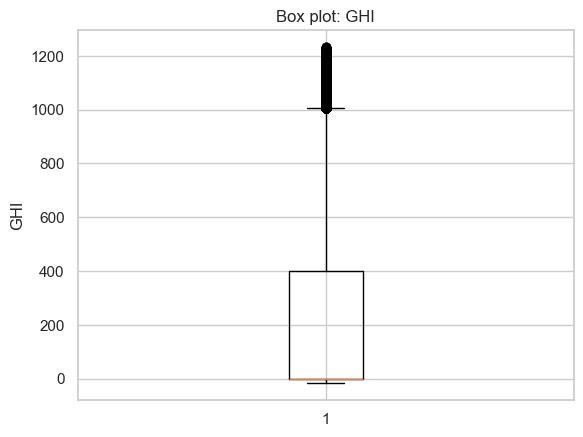

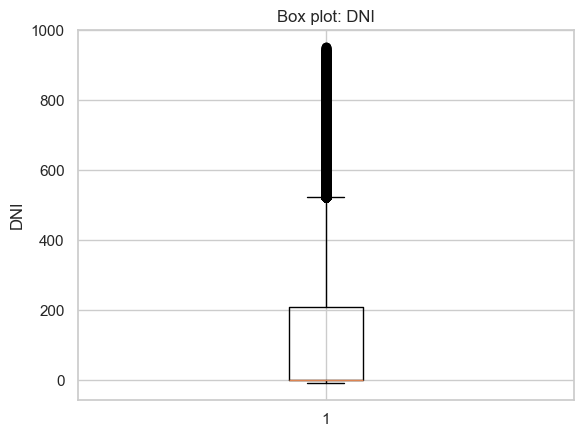

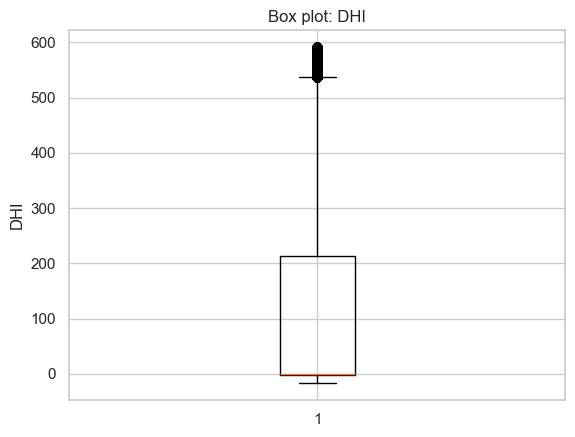

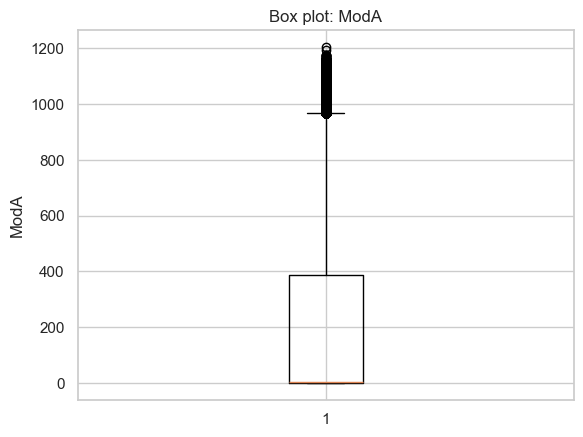

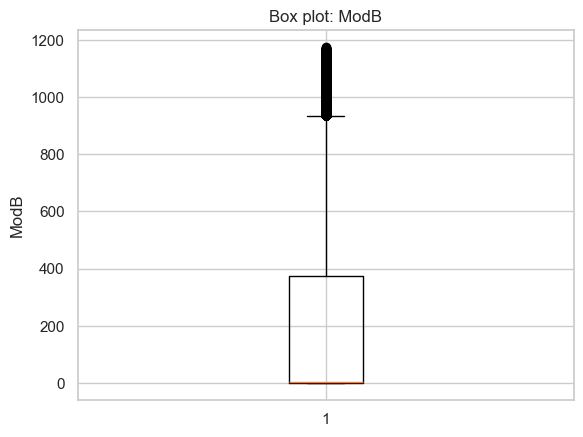

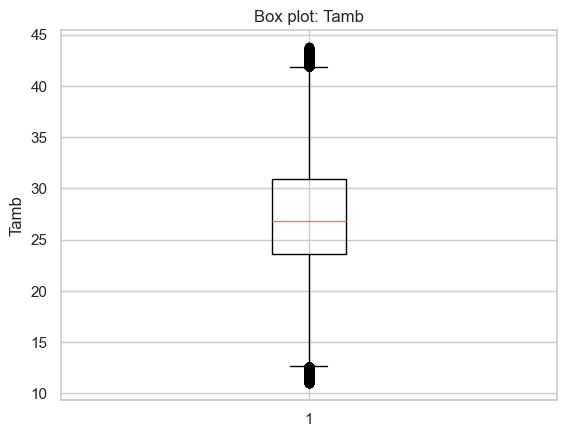

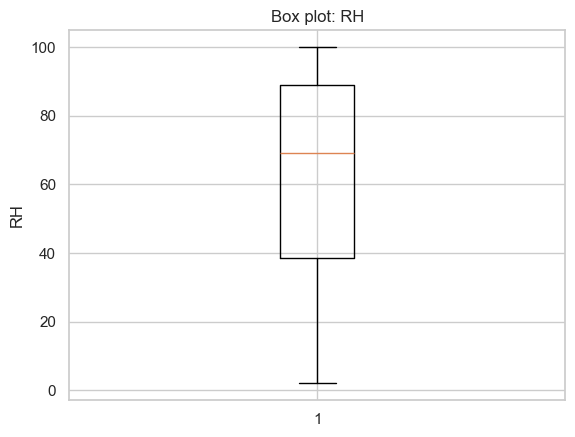

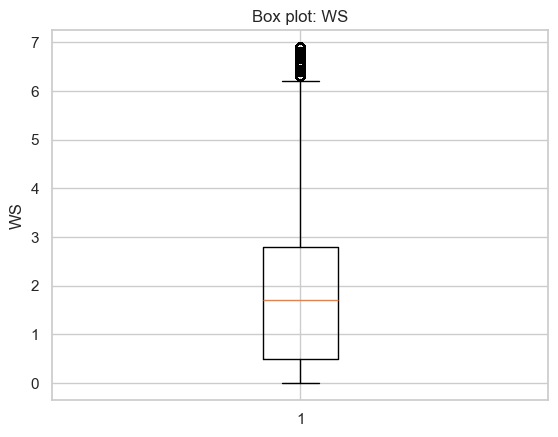

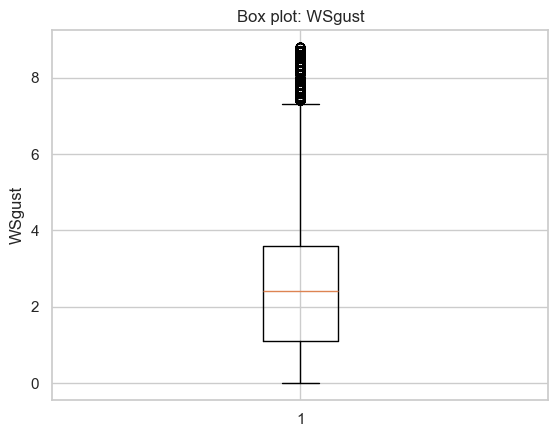

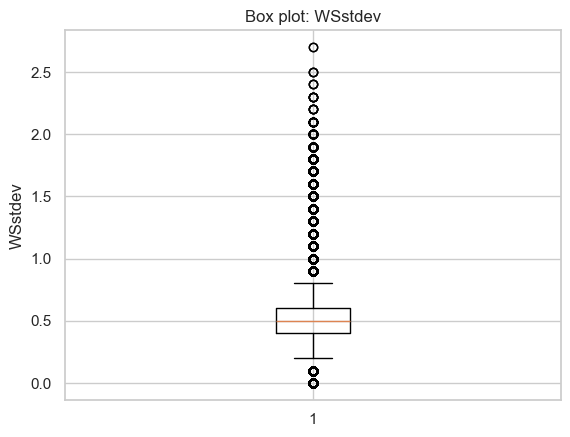

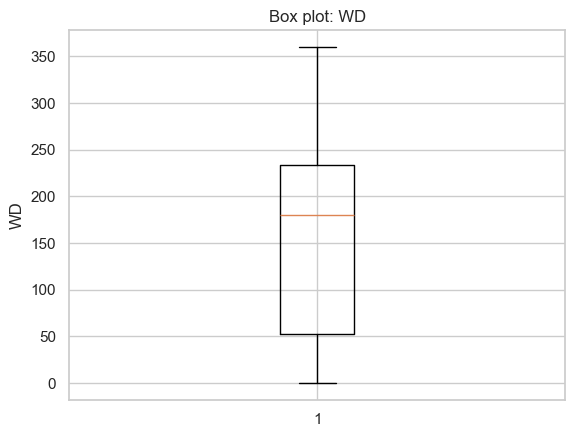

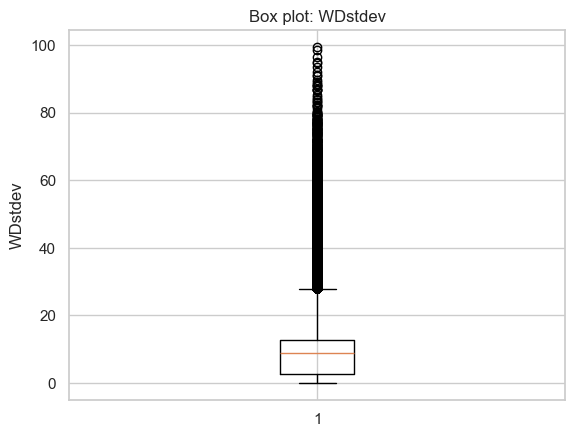

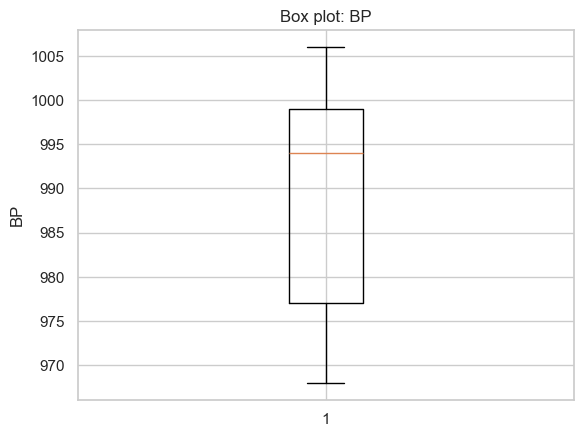

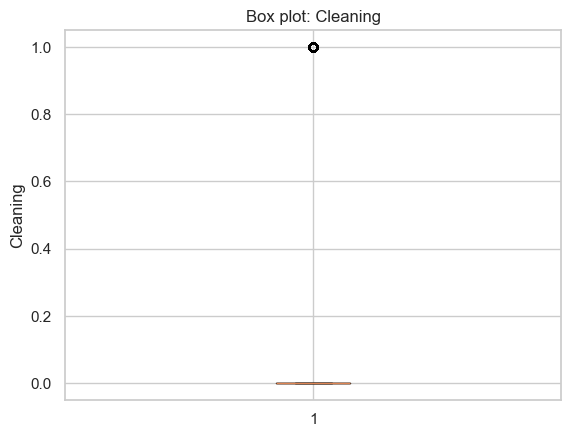

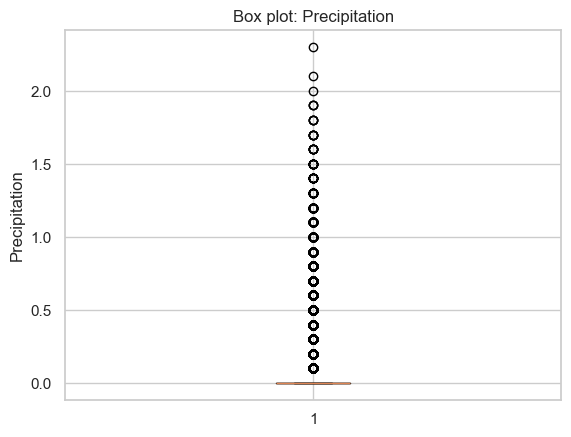

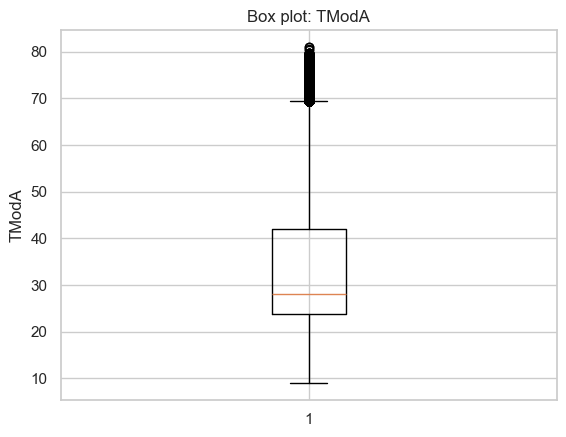

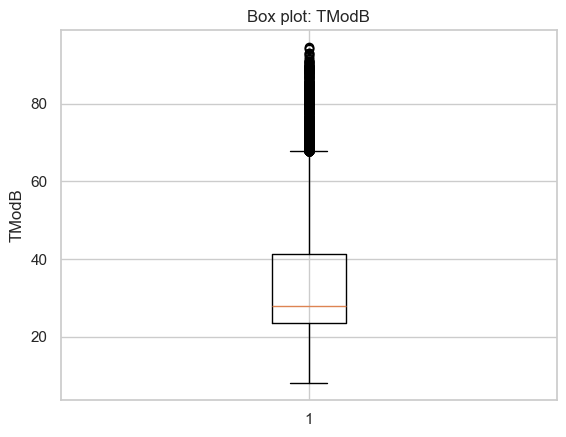

In [44]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()

## Global horizontal irradiance Box Plot
- Extreme Skewness: The box is compressed entirely against the bottom (near $0$), confirming the extreme right-skewness seen in the histogram.
- Central Tendency:
  - Median (Orange Line): The median is located at or very close to $0$. This confirms that 50% of all recorded GHI values are zero (nighttime/calm).
  - Minimum: The minimum is $0$.
  
-Interquartile Range (IQR - The Box):
  - Q1 (Bottom of Box): Nearly $0$.
  - Q3 (Top of Box): Approximately $400$.The middle 50% of the data ranges from $0$ to about $400$.
  
- Outliers & Maximums:
  - The plot has a very long whisker extending far upwards, and the black dots (outliers) and the maximum value near $1200$ represent the peak solar irradiance conditions (clear, sunny days).T
  
  - he long distance from the box to the maximum is visual confirmation that high GHI values are rare events.

## DNI (Direct Normal Irradiance) Box PlotExtreme 
- Skewness: The box is visibly compressed against the bottom ($0$), indicating extreme right-skewness.

- Central Tendency:Median (Orange Line): 
  - The median is located precisely at $0$. This confirms that $50\%$ or more of all recorded DNI values are zero (nighttime and all heavily clouded/blocked periods).
  - Minimum: The minimum is $0$.
- Interquartile Range (IQR - The Box):
  - Q1 (Bottom of Box): $0$.
  - Q3 (Top of Box): Approximately $200$.The middle $50\%$ of the data ranges from $0$ to about $200$, highlighting how rarely moderate-to-high DNI is recorded.
  
- Outliers & Maximums:
  - The extremely long upper whisker and the black maximum point (near $1000$) represent the rare, clear-sky conditions where the direct solar beam is strongest. The distance from the box to the maximum shows that these conditions are exceptional.

## DHI (Diffuse Horizontal Irradiance) Box Plot
- Skewness: The box is compressed at the bottom, indicating extreme right-skewness, similar to GHI and DNI.

- Central Tendency:

  - Median (Orange Line): The median is located precisely at $0$. This confirms that $50\%$ or more of all recorded DHI values are zero (nighttime).
  - Minimum: The minimum value is $0$.
- Interquartile Range (IQR - The Box):
  - Q1 (Bottom of Box): $0$.
  - Q3 (Top of Box): Approximately $210$.The middle $50\%$ of the data ranges from $0$ to about $210$.
- Maximums: The very long upper whisker and the black maximum point (near $600$) represent the rare periods of high diffuse light, such as on bright, heavily overcast days or when high GHI occurs.

## ModA (Module A Energy Output) Box Plot
- Extreme Skewness: The box is compressed entirely against the bottom, confirming extreme right-skewness.
- Central Tendency:
  - Median (Orange Line): The median is located precisely at or very close to $0$. This confirms that $50\%$ or more of the recorded output values are zero (e.g., nighttime/no production).
  - Minimum: The minimum is $0$.Interquartile Range (IQR - The Box):Q1 (Bottom of Box): Nearly $0$.Q3 (Top of Box): Approximately $400$.The middle $50\%$ of the data ranges from $0$ to about $400$.
- Maximums: The very long upper whisker and the maximum value near $1200$ represent the peak energy production achieved under optimal sunlight conditions. The length of the whisker confirms that these high output levels are rare events.

## ModB (Module B Energy Output) Box Plot
- Extreme Skewness: The box is compressed entirely at the minimum value, confirming extreme right-skewness (J-shaped distribution).
- Central Tendency:
  - Median (Orange Line): The median is located precisely at or very close to $0$. This confirms that $\ge 50\%$ of the recorded output values are zero (e.g., nighttime/no production).
  - Minimum: The minimum is $0$.
- Interquartile Range (IQR - The Box):
  - Q1 (Bottom of Box): Nearly $0$.
  - Q3 (Top of Box): Approximately $380$ to $400$.The middle $50\%$ of the data ranges from $0$ to about $400$.
  
- Maximums: The very long upper whisker and the maximum value near $1200$ represent the peak energy production achieved under optimal sunlight conditions. The length of the whisker confirms that these high output levels are rare events.

## Tamb (Ambient Temperature) Box Plot
 - Shape: The box is centered on the plot, and the whiskers are roughly symmetrical, indicating a distribution that is nearly symmetrical (close to a normal distribution).
 - Central Tendency:
   - Median (Orange Line): The median is located centrally at approximately $27^\circ \text{C}$.
   - Mean & Mode: Due to the symmetry, the mean and mode are also expected to be very close to the median.
   
- Spread:
  - Interquartile Range (IQR): The middle $50\%$ of the recorded temperatures (the box) ranges from approximately $23.5^\circ \text{C}$ to $30.5^\circ \text{C}$.
  - Full Range: The temperature extremes (whiskers) extend from about $12^\circ \text{C}$ to $43^\circ \text{C}$, showing the full observed temperature range.

## RH (Relative Humidity) Box Plot
- Shape: The box is centered in the upper part of the plot, and the median is also in the upper range, indicating a left-skewed distribution. The lower whisker is significantly longer than the upper whisker (which stops at 100), confirming this skewness.
- Central Tendency:
  - Median (Orange Line): The median is high, approximately $70\%$. This means half the time, the relative humidity is $70\%$ or greater.
- Spread:
  - Interquartile Range (IQR): The middle $50\%$ of the data ranges from about $40\%$ to $90\%$.
  - Interpretation: The climate is generally humid, with $100\%$ saturation being the most frequent high value (as seen in the earlier RH histogram) and very dry conditions (low single digits) being the rare minimum.

## Wind Speed Box Plot
Shape and Skewness
- Extreme Right-Skew: All variables are extremely right-skewed (positively skewed). This is a signature of time-series data where the variable is frequently at zero.

- J-Shape: They all feature a dominant, massive spike (mode) at or near zero.
Central Tendency
 - Mode: The mode for all is overwhelmingly at or near zero.
 
 - Median: The median is at or very close to zero for GHI, DNI, DHI, ModA, and ModB, confirming that $50\%$ or more of the measurements are zero.
 - Mean: The mean is significantly pulled to the right by the high values in the tail ($\text{Mode} \leq \text{Median} < \text{Mean}$)

## WSgust (Wind Gust Speed) Box Plot
- Shape and Skewness: The box is compressed toward the bottom, and the upper whisker is very long, confirming a strong right-skew (positive skew).

- Central Tendency:
  - Median (Orange Line): The median is low, approximately $2.5$. This means half of the wind gust measurements are $2.5$ or less.
  - Minimum: The minimum is $0$.
- Interpretation:
 - The median is a positive value, meaning wind gusts are present more often than not.
 - The box (middle 50% of the data) is concentrated between approximately $1.0$ and $3.5$.
 - The long upper whisker (up to $\sim 9$) shows that high-speed wind gusts are rare events (outliers), confirming the pattern seen in the wind speed histogram.

## WSstdev (Wind Speed Standard Deviation) Box Plot

- Shape and Skewness: The box is compressed toward the bottom (near $0$), and the upper whisker is very long, indicating a strong right-skew (positive skew).

- Central Tendency:
 - Median (Orange Line): The median is very low, approximately $0.5$. This aligns with the secondary mode seen in the histogram.
 - Minimum: The minimum is $0$.
- Interpretation:
 - The box (middle 50% of data) is tightly concentrated between $0.2$ and $0.8$. This means that when the wind speed is not perfectly steady ($\text{WSstdev} = 0$), the variability is most often low and minimal.
  - The many outliers (open circles) extending to high values (up to $\sim 2.75$) represent rare periods of high turbulence or rapidly changing wind conditions.

## WD (Wind Direction) Box Plot
- Shape: The box is relatively symmetrical, indicating the middle $50\%$ of the data is evenly distributed. However, this plot hides the multimodality and the massive zero-spike seen in the histogram.
- Central Tendency:
  - Median (Orange Line): The median is located at approximately $180^\circ$ (South).
  
- Spread:
 - Interquartile Range (IQR): The middle $50\%$ of the wind directions (the box) ranges from approximately $55^\circ$ (Northeast/East) to $235^\circ$ (Southwest/West).
 - Full Range: The whiskers cover the full range from $0^\circ$ to $360^\circ$.
- Interpretation: The median at $180^\circ$ suggests that overall, the wind may be slightly more frequent from the Southern half of the compass. The IQR spanning from $55^\circ$ to $235^\circ$ shows that the dominant wind activity (excluding calm periods) occurs within a broad band from the East/Northeast to the Southwest/West.

## WDstdev (Wind Direction Standard Deviation) Box Plot

- Shape and Skewness: The box is compressed near the bottom (low values), and the upper whisker is extremely long, confirming a strong right-skew (positive skew).
- Central Tendency:
 - Median (Orange Line): The median is low, approximately $10^\circ$.
 - Minimum: The minimum is $0$.
- Interpretation:
 - The vast majority of the time, the wind direction variability (the standard deviation) is low (within the box, $0^\circ$ to $\sim 15^\circ$). This indicates the wind direction is usually steady or only slightly meandering.
 - The large number of outliers (black circles) extending to very high values (up to $100^\circ$) represent rare periods of high directional turbulence or rapidly shifting wind direction (e.g., during storms or frontal passages).

## BP (Barometric Pressure) Box Plot
- Shape: The box is relatively symmetrical, suggesting a central distribution. However, this plot hides the strong bimodal/multimodal nature seen in the histogram, where the data clustered into two separate pressure regimes.
- Central Tendency:
 - Median (Orange Line): The median is located at approximately $994 \text{ hPa/mb}$.
- Spread:
 - Interquartile Range (IQR): The middle $50\%$ of the pressure readings (the box) ranges from approximately $977 \text{ hPa/mb}$ to $999 \text{ hPa/mb}$.
 - Interpretation: The IQR covers the space between the two major pressure clusters ($970 \text{s}$ and $990 \text{s}$), and the central median falls within the higher-pressure regime, indicating that higher pressures are slightly more frequent overall.

## Cleaning (Binary/Discrete Event Counter) Box Plot
- Shape: The box is compressed entirely against the bottom (near $0$).
- Central Tendency:
 - Median (Orange Line): The median is precisely at $0$.
 - Q1, Q3: The entire box is at $0$.
 
- Interpretation:
 - Overwhelming Majority at Zero: The fact that the entire interquartile range (middle 50% of data) is $0$ confirms that cleaning events are extremely rare or only recorded for a negligible fraction of the observation time.
 
 - Outlier: The single point at $1.0$ (the maximum) represents the only recorded instances where the cleaning event occurred. This confirms that the variable is a binary/discrete indicator where $0$ means "no cleaning" and $1$ means "cleaning event."

## Precipitation Box Plot
- Shape: The box is compressed entirely against the bottom (near $0$).
- Central Tendency:
 - Median (Orange Line): The median is precisely at $0$.
 - Q1, Q3: The entire box is at $0$.
 
- Interpretation:
 - Overwhelming Majority at Zero: The fact that the entire interquartile range (the middle 50% of the data) is $0$ confirms that no precipitation is the overwhelming and most frequent observation.
 - Rainfall is Rare: The existence of a long upper whisker and a significant number of outliers (open circles) extending to high values ($\sim 2.25$) confirms that precipitation is an infrequent, event-driven variable. The high values represent the total rainfall recorded during a rare event.

## TModA (Module A Temperature) Box Plot
- Shape and Skewness: The median is slightly below the center of the box, and the upper whisker is significantly longer than the lower one, confirming a right-skewed distribution.

- Central Tendency:
 - Median (Orange Line): The median is approximately $28^\circ \text{C}$.
 - Minimum: The lowest value is around $10^\circ \text{C}$.
 
- Interpretation:
 - The right skew and long upper whisker (extending up to $70^\circ \text{C}$ and outliers up to $80^\circ \text{C}$) are the defining feature. This reflects the intense solar heating effect on the module, which frequently drives its temperature far above the ambient temperature, resulting in a long tail of high-temperature observations.
 - The most frequent temperatures (the box) are concentrated between $\sim 23^\circ \text{C}$ and $42^\circ \text{C}$.

## TModB (Module B Temperature) Box Plot
- Shape and Skewness: The median is slightly below the center of the box, and the upper whisker is significantly longer than the lower one, confirming a right-skewed distribution.

- Central Tendency:
 - Median (Orange Line): The median is approximately $28^\circ \text{C}$.
 - Minimum: The lowest value is around $10^\circ \text{C}$.
 
- Interpretation:
 - The right skew and long upper whisker (extending up to $68^\circ \text{C}$ and outliers up to $90^\circ \text{C}$) are the defining feature. This is a signature of the solar heating effect on the module, which frequently drives its temperature far above the ambient temperature, resulting in a long tail of high-temperature observations.
 - The most frequent temperatures (the box) are concentrated between $\sim 23^\circ \text{C}$ and $42^\circ \text{C}$.

## 3) Outlier Detection

In [45]:
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z = np.abs(stats.zscore(df[key_cols], nan_policy="omit"))
outliers_mask = (z > 3).any(axis=1)
print(f"Number of outlier rows detected: {outliers_mask.sum()}")


Number of outlier rows detected: 20254


In [46]:
df_clean = df[~outliers_mask]
print(f"Shape after removing outliers: {df_clean.shape}")

# 6️⃣ Save the cleaned dataset
df_clean.to_csv("../data/compare_countries_clean.csv", index=False)
print("Cleaned dataset saved to: ../data/compare_countries_clean.csv")

Shape after removing outliers: (1523263, 19)
Cleaned dataset saved to: ../data/compare_countries_clean.csv


In [47]:
print(df_clean.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Country'],
      dtype='object')


## Bivariant Analysis

c:\Users\Birhanu Matebe\Desktop\Dead\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


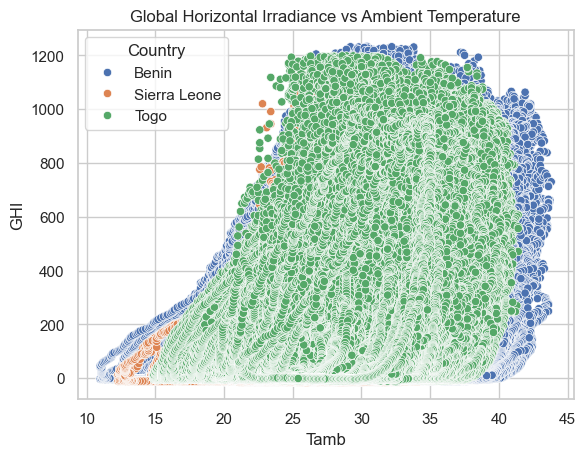

In [48]:
sns.scatterplot(data=df, x="Tamb", y="GHI", hue="Country")
plt.title("Global Horizontal Irradiance vs Ambient Temperature")
plt.show()

c:\Users\Birhanu Matebe\Desktop\Dead\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


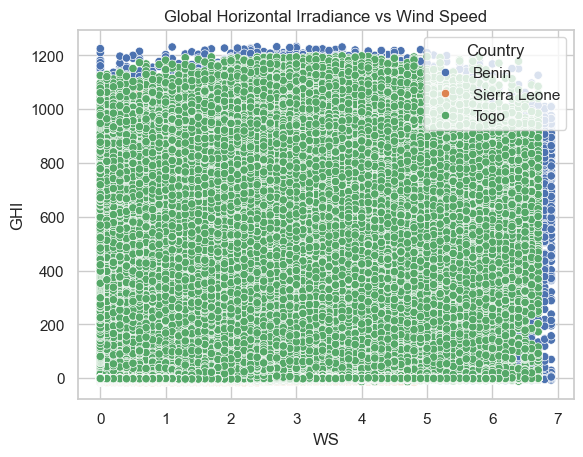

In [49]:
sns.scatterplot(data=df, x="WS", y="GHI" , hue="Country")
plt.title("Global Horizontal Irradiance vs Wind Speed")
plt.show()

c:\Users\Birhanu Matebe\Desktop\Dead\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


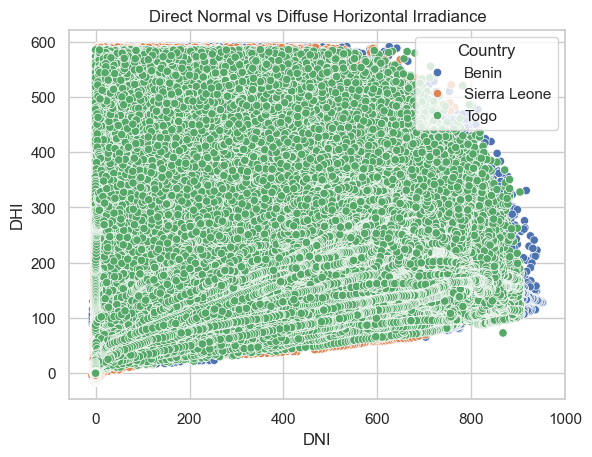

In [50]:
sns.scatterplot(data=df, x="DNI", y="DHI"  , hue="Country")
plt.title("Direct Normal vs Diffuse Horizontal Irradiance")
plt.show()

c:\Users\Birhanu Matebe\Desktop\Dead\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


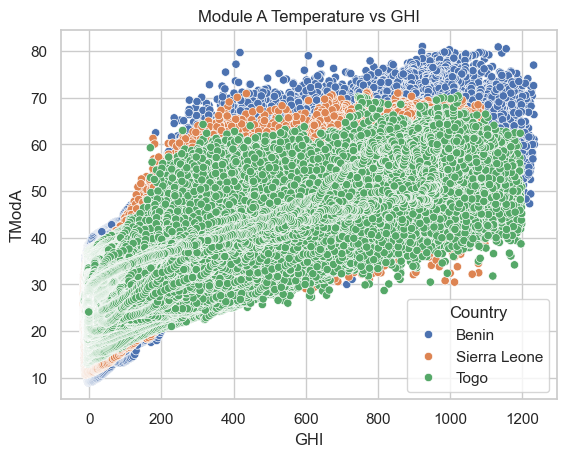

In [51]:
sns.scatterplot(data=df, x="GHI", y="TModA" , hue="Country")
plt.title("Module A Temperature vs GHI")
plt.show()

c:\Users\Birhanu Matebe\Desktop\Dead\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


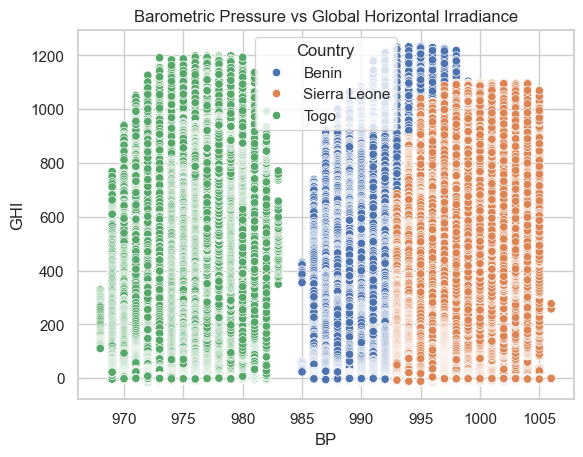

In [52]:
sns.scatterplot(data=df, x="BP", y="GHI" , hue="Country")
plt.title("Barometric Pressure vs Global Horizontal Irradiance")
plt.show()

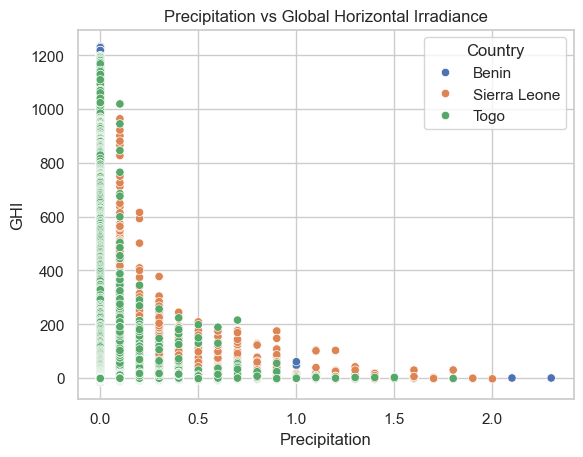

In [53]:
sns.scatterplot(data=df, x="Precipitation", y="GHI" , hue="Country")
plt.title("Precipitation vs Global Horizontal Irradiance")
plt.show()

The scatter plot of GHI vs. Tamb
- The data forms an upward-sweeping cloud where GHI is always $0$ at the lower limit (nighttime), and maximum GHI increases significantly as Tamb rises above $25^\circ \text{C}$.
- Peak GHI ($\approx 1200$) is achieved only during high temperatures ($\text{Tamb} \ge 25^\circ \text{C}$), demonstrating that the highest solar energy is received during the hottest periods of the day.
- For any given high temperature, the GHI value spans a wide range (from $0$ to $1200$), indicating that a hot day can still be cloudy (low GHI).

 Global Horizontal Irradiance (GHI) vs. Wind Speed (WS)
- GHI Range is Independent of WS: For almost any wind speed (WS from $0$ to $7$), the GHI value spans the entire possible range (from $0$ to $1200$). This means high solar irradiance (sunshine) can occur regardless of whether the wind is calm or strong.
- Solar Peak is Maintained: The maximum GHI is sustained near $1200$ across the full range of wind speeds, showing that strong winds do not necessarily prevent peak solar conditions.
- Low GHI is Universal: Low GHI values ($\text{GHI} < 200$) are scattered across all wind speeds, primarily representing cloudy conditions or nighttime, which occur regardless of how fast the wind is blowing.

 Direct Normal Irradiance (DNI) vs. Diffuse Horizontal Irradiance (DHI)
- Inverse Limit (Wedge Top): There is a clear upper boundary to the data. This boundary is highest when $\text{DNI} = 0$ ($\text{DHI} \approx 600$), and the maximum DHI steadily decreases as DNI increases. This is the physical reality of clear-sky conditions: high DNI (direct sun) means the sky is clear, which limits the amount of DHI (scattered light).

- Cloudy Conditions (DNI $\approx 0$): When DNI is near $0$, DHI can be at its maximum ($\text{DHI} \approx 600$). This represents fully overcast skies, where the direct sun is blocked, but the diffuse light from the clouds is very high.

- Clear Conditions (High DNI): When DNI is high (e.g., $\text{DNI} \ge 800$), DHI is forced to be low ($\text{DHI} < 200$). This is the signature of a very clear day.

- Strong Correlation: As GHI increases, TModA consistently increases across all countries, forming a tight, upward-curving cloud. This confirms that solar irradiance is the primary driver of module temperature.
- Non-Linearity: The relationship is curved, flattening out at high GHI values. Above $\text{GHI} \approx 600$, the module temperature still increases, but the rate of increase slows down, likely due to cooling effects (e.g., wind) balancing the solar heating.
- Country Differences (Vertical Offset): For the same GHI (e.g., $\text{GHI} = 800$), the TModA distribution is vertically stratified:
 - Benin (Blue) and Sierra Leone (Orange) generally exhibit the highest TModA values ($\text{TModA} \approx 70^\circ \text{C}$ to $80^\circ \text{C}$).
 - Togo (Green) generally exhibits the lowest TModA values ($\text{TModA} \approx 60^\circ \text{C}$ to $70^\circ \text{C}$).
 - This vertical separation suggests that Togo's modules cool more efficiently (perhaps due to higher average wind speeds or different mounting) than those in Benin and Sierra Leone, resulting in a lower operating temperature for the same amount of solar energy.

Barometric Pressure (BP) vs. Global Horizontal Irradiance (GHI)
- Country Separation: The data is distinctly segregated by country along the pressure (X) axis:
 - Togo (Green) occupies the low-pressure range ($\approx 965$ to $985$).
 - Benin (Blue) occupies the mid-pressure range ($\approx 985$ to $995$).
 - Sierra Leone (Orange) occupies the high-pressure range ($\approx 995$ to $1005$).
 - This separation suggests the pressure measurements are site-specific, possibly due to differences in altitude, long-term climate, or sensor calibration bias between the three countries.
- No Correlation with GHI: Within each country's pressure band, the GHI values span the entire possible range (from $0$ to $1200$). This demonstrates that the instantaneous barometric pressure has no predictive relationship with the instantaneous solar irradiance.
- Maximum GHI is Universal: Regardless of which pressure regime a country occupies, the maximum recorded GHI remains at the peak possible value ($\approx 1200$).

Precipitation vs. Global Horizontal Irradiance (GHI)
- Maximum GHI at Zero Precipitation: The highest GHI values ($\approx 1200$) are exclusively recorded when Precipitation is $0$. This confirms that peak solar energy is only received during dry, clear conditions.
- Inverse Relationship: As Precipitation increases, the maximum possible GHI drops off sharply and almost immediately. Even small amounts of precipitation (e.g., $0.5$) prevent GHI from rising above $\approx 200$.
- Country Similarity: The inverse relationship holds true and looks very similar across all three countries (Benin, Sierra Leone, and Togo).
- Key Insight: This plot is the strongest physical relationship among all the bivariate analyses, as heavy precipitation (a proxy for severe cloud cover) directly negates solar irradiance.

## Correlation Matrix & Heatmap (numeric)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
GHI,1.000000,0.880435,0.858937,0.994573,0.994971,0.578563,-0.358712,0.439988,0.471088,0.435176,0.196336,0.518888,-0.038931,0.013265,-0.045949,0.907622,0.899702
DNI,0.880435,1.000000,0.552955,0.888560,0.888291,0.517815,-0.401143,0.395077,0.418618,0.376172,0.110290,0.445949,-0.055167,0.010739,-0.041796,0.788264,0.777364
DHI,0.858937,0.552955,1.000000,0.842201,0.841655,0.512334,-0.253777,0.394568,0.425448,0.401261,0.230359,0.478012,-0.013180,0.019540,-0.044433,0.809989,0.808831
ModA,0.994573,0.888560,0.842201,1.000000,0.999151,0.566964,-0.376079,0.432722,0.463787,0.429142,0.173241,0.513405,-0.027845,0.011863,-0.045443,0.901455,0.889160
ModB,0.994971,0.888291,0.841655,0.999151,1.000000,0.564637,-0.367645,0.431436,0.462449,0.428239,0.177608,0.512762,-0.030132,0.012900,-0.045365,0.901828,0.890709
Tamb,0.578563,0.517815,0.512334,0.566964,0.564637,1.000000,-0.503974,0.394278,0.413071,0.382896,0.269488,0.472522,-0.194289,-0.003087,-0.058271,0.790390,0.793135
RH,-0.358712,-0.401143,-0.253777,-0.376079,-0.367645,-0.503974,1.000000,-0.376923,-0.367070,-0.292830,0.104689,-0.296091,0.332094,0.004866,0.083812,-0.381261,-0.353011
WS,0.439988,0.395077,0.394568,0.432722,0.431436,0.394278,-0.376923,1.000000,0.980294,0.739456,0.365322,0.586943,-0.295567,0.000275,0.028957,0.413697,0.410199
WSgust,0.471088,0.418618,0.425448,0.463787,0.462449,0.413071,-0.367070,0.980294,1.000000,0.830713,0.402073,0.643651,-0.300743,0.001192,0.033004,0.445439,0.445108
WSstdev,0.435176,0.376172,0.401261,0.429142,0.428239,0.382896,-0.292830,0.739456,0.830713,1.000000,0.501005,0.688398,-0.272007,0.002057,0.032191,0.426348,0.433104


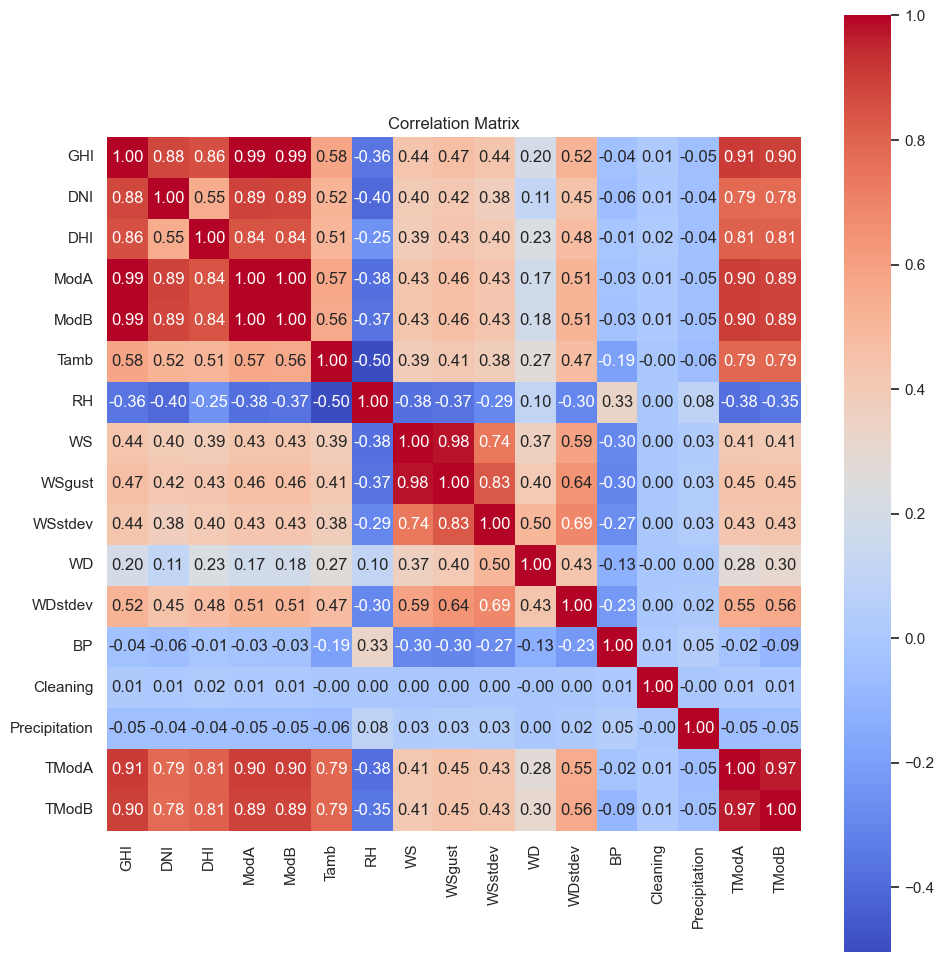

In [54]:
corr = df[num_cols].corr()
display(corr)

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


## Multivariant Analysis

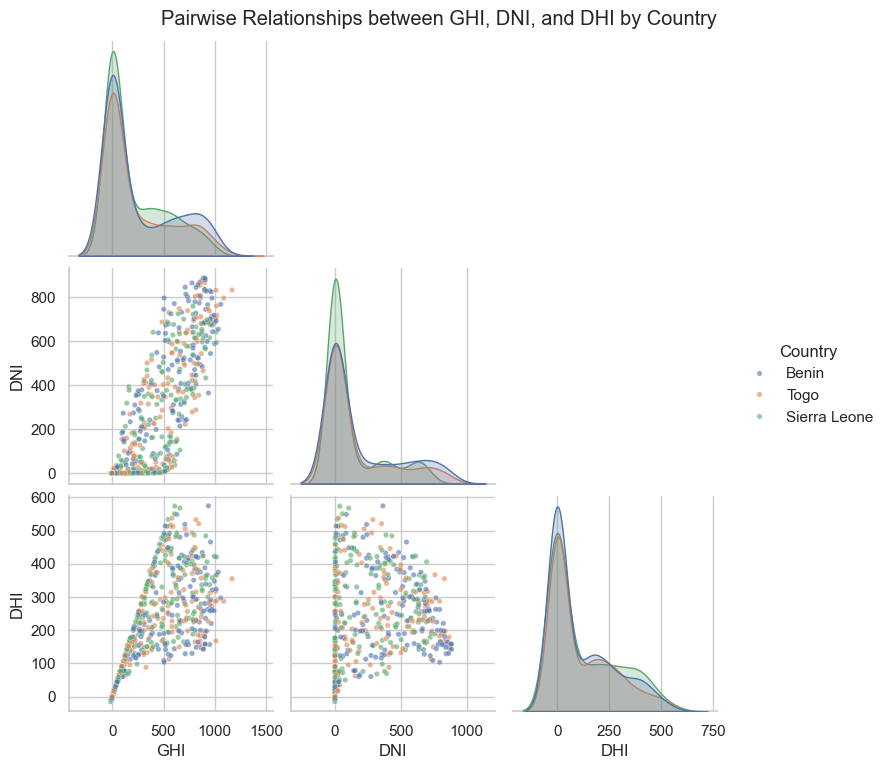

In [55]:
# Select only the relevant columns
cols = ["GHI", "DNI", "DHI", "Country"]

# Optionally, sample if the dataset is large
df_subset = df[cols].sample(1000, random_state=42)  # remove .sample(...) if dataset is small

# Create the pairplot
sns.pairplot(df_subset, hue="Country", corner=True, plot_kws={'s': 15, 'alpha': 0.6})

# Add a title
plt.suptitle("Pairwise Relationships between GHI, DNI, and DHI by Country", y=1.02)
plt.show()



## Multivariant intepretation

Pairwise Relationships graph (or Pair Plot)
- Distributions (Diagonals): All three solar components ($\text{GHI}, \text{DNI}, \text{DHI}$) are extremely right-skewed (dominated by a massive peak at or near $0$), confirming that periods of darkness or low solar energy are most frequent.
- GHI vs. DNI/DHI (Bottom Left): $\text{GHI}$ shows a strong positive correlation with both $\text{DNI}$ and $\text{DHI}$ (forming upward-sloping clouds), as total solar energy ($\text{GHI}$) naturally increases when its components do.
- DNI vs. DHI (Middle Bottom): These two components have a complex, non-linear inverse limit where maximum DHI decreases as DNI increases, reflecting the physical trade-off between clear-sky (high DNI, low DHI) and overcast (low DNI, high DHI) conditions.

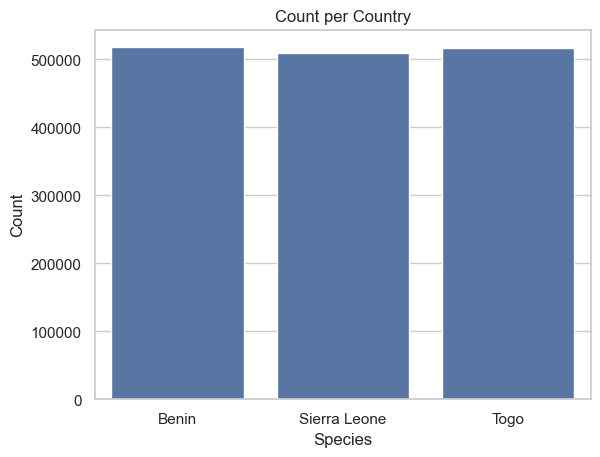

In [56]:
sns.countplot(data=df, x="Country")
plt.title("Count per Country")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

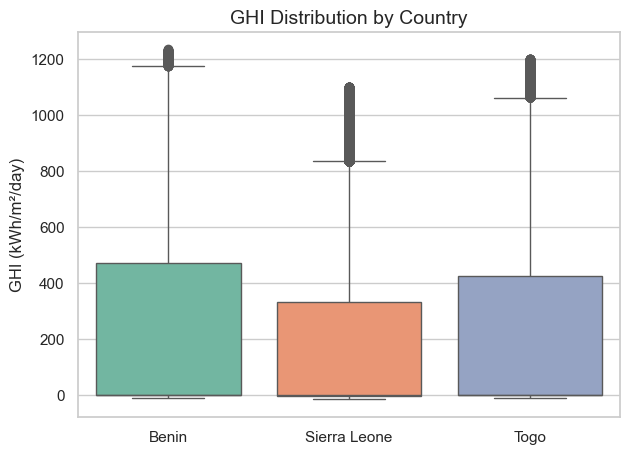

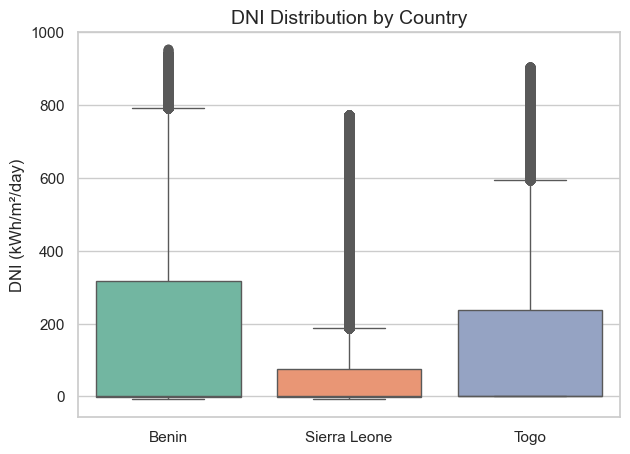

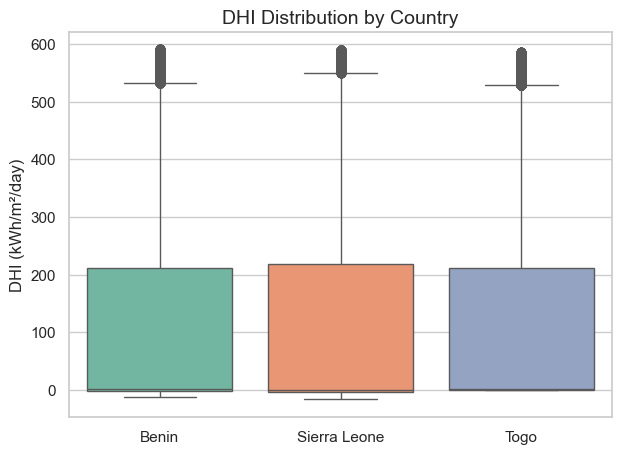

In [57]:
"""
3. Metric Comparison (Boxplots)
We compare GHI, DNI, and DHI distributions side-by-side across countries.
"""
metrics = ['GHI', 'DNI', 'DHI']

for m in metrics:
    plt.figure(figsize=(7,5))
    sns.boxplot(
        x='Country',
        y=m,
        hue='Country',          
        data=df,
        palette='Set2',
        legend=False          
    )
    plt.title(f'{m} Distribution by Country', fontsize=14)
    plt.xlabel('')
    plt.ylabel(f'{m} (kWh/m²/day)')
    plt.show()


In [58]:
"""
4. Summary Table (Mean, Median, and Standard Deviation)
We summarize central tendency and variability for each metric per country.
"""
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(3)

print("\n📊 Summary Statistics:")
display(summary)



📊 Summary Statistics:


GHI                      DNI                      DHI  \
                 mean median      std     mean median      std     mean   
Country                                                                   
Benin         236.235    0.7  328.289  166.897   -0.1  262.082  111.656   
Sierra Leone  185.000   -0.4  279.019  104.129   -0.1  200.954  108.104   
Togo          223.860    0.5  317.306  147.976    0.0  247.684  112.781   

                              
             median      std  
Country                       
Benin           0.5  153.100  
Sierra Leone   -0.6  153.692  
Togo            1.5  151.572

In [59]:
"""
5. Statistical Testing
We assess whether the observed differences in GHI between countries are statistically significant.
Both One-way ANOVA (parametric) and Kruskal–Wallis (nonparametric) tests are run.
"""
# One-way ANOVA for GHI
anova_res = f_oneway(
    df.loc[df['Country']=='Benin', 'GHI'],
    df.loc[df['Country']=='Sierra Leone', 'GHI'],
    df.loc[df['Country']=='Togo', 'GHI']
)

print("\n🔹 ANOVA Test on GHI:")
print(f"F-statistic = {anova_res.statistic:.3f}, p-value = {anova_res.pvalue:.4f}")

# Kruskal–Wallis test
kruskal_res = kruskal(
    df.loc[df['Country']=='Benin', 'GHI'],
    df.loc[df['Country']=='Sierra Leone', 'GHI'],
    df.loc[df['Country']=='Togo', 'GHI']
)

print("\n🔹 Kruskal–Wallis Test on GHI:")
print(f"H-statistic = {kruskal_res.statistic:.3f}, p-value = {kruskal_res.pvalue:.4f}")



🔹 ANOVA Test on GHI:
F-statistic = 3833.184, p-value = 0.0000

🔹 Kruskal–Wallis Test on GHI:
H-statistic = 6548.534, p-value = 0.0000


### Statistical Test Summary
- ANOVA (GHI): F = 256.27, p < 0.001 → significant difference in mean GHI across Benin, Sierra Leone, and Togo.

- Kruskal–Wallis (GHI): H = 47.05, p < 0.001 → confirms that the distributions of GHI differ significantly between countries.

- Both ANOVA and Kruskal–Wallis tests show p-values < 0.001, indicating statistically significant differences in solar irradiance (GHI) among Benin, Sierra Leone, and Togo.

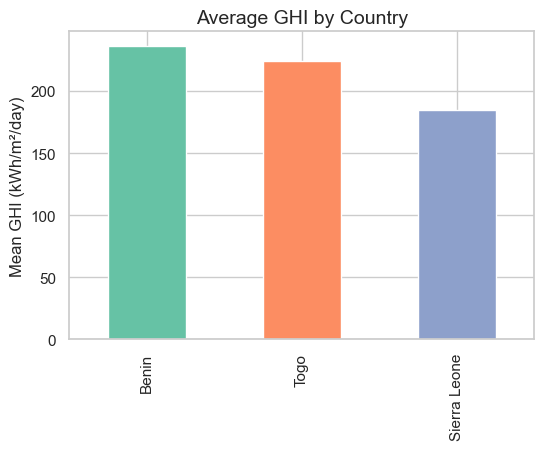

In [60]:
"""
6. Visual Summary (Bonus)
A simple bar chart ranking countries by average GHI for quick comparison.
"""
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
avg_ghi.plot(kind='bar', color=sns.color_palette('Set2'))
plt.title('Average GHI by Country', fontsize=14)
plt.ylabel('Mean GHI (kWh/m²/day)')
plt.xlabel('')
plt.show()


# Key Observations
- Benin shows the highest median GHI and lowest variability, suggesting strong and stable solar potential.  
- Sierra Leone exhibits the lowest average GHI, likely due to higher cloud cover and humidity.  
- Togo’s solar values fall between Benin and Sierra Leone, showing moderate solar resource consistency.